In [1]:
import math
import numpy as np
import scipy
from scipy.special import erfc
from math import sqrt
import matplotlib.pyplot as plt

%matplotlib inline

#  Jenkins (1968)
# Streamflow depletion with fully-penetrating stream and no streambed.

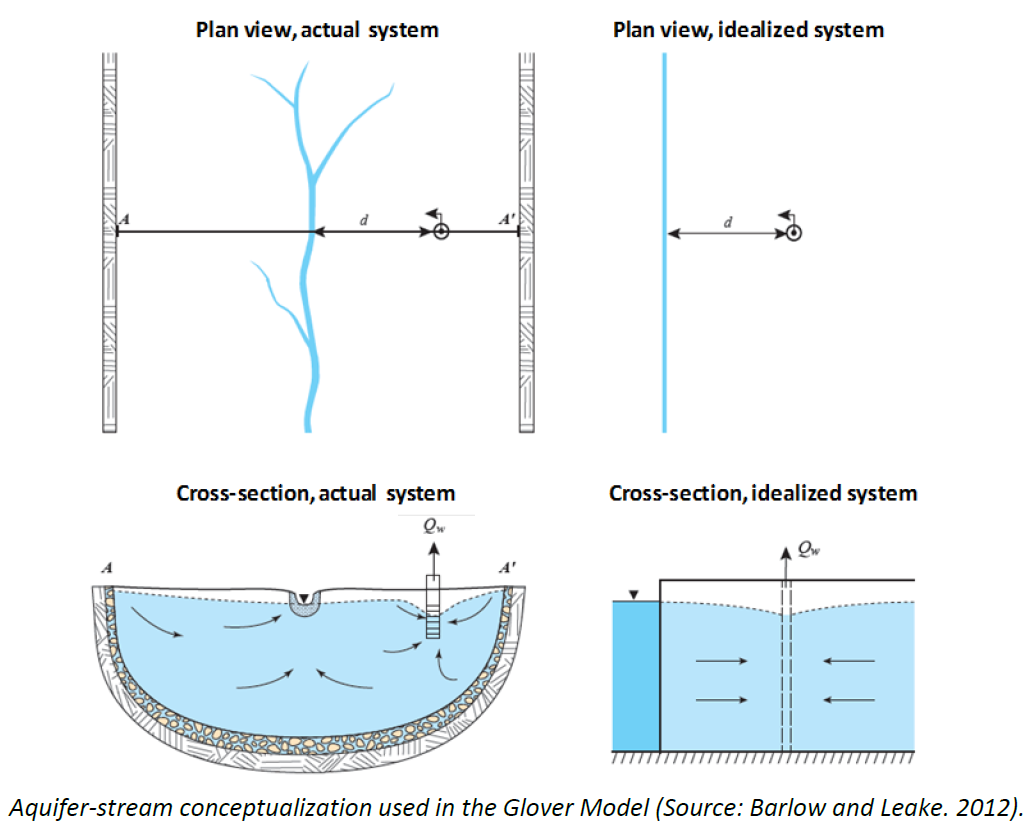

In [2]:
from IPython.display import Image 
pil_img = Image(filename='Glover1954.png')
display(pil_img)

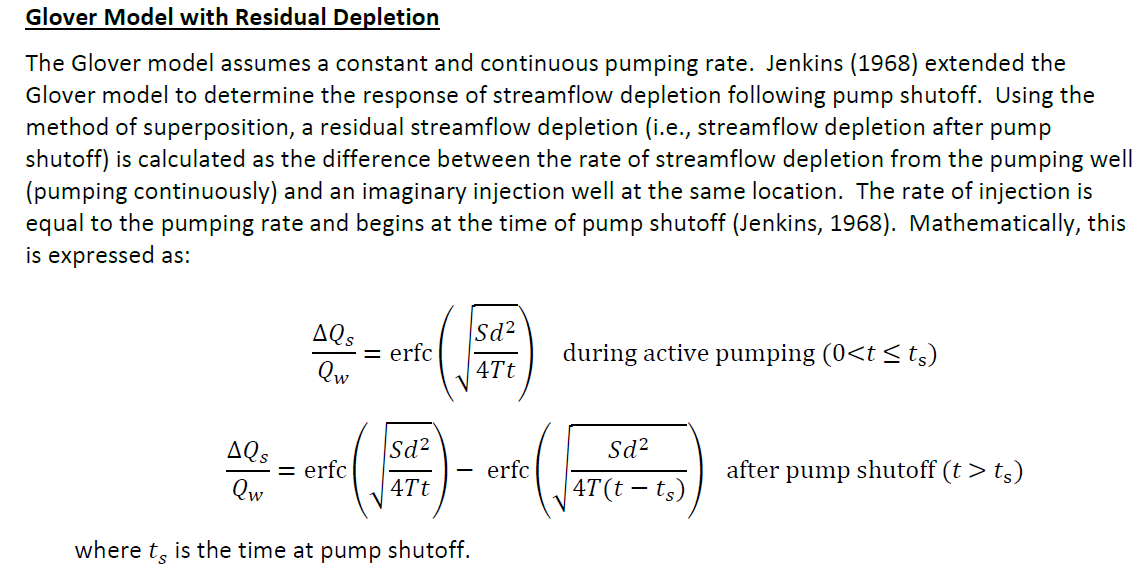

In [3]:
pil_img = Image(filename='Jenkins1968_f.png')
display(pil_img)

In [4]:
# constants
S = 0.15    # param S aquifer storage coefficient []
d = 100      # param d distance from well to stream [L]
Tr = 10   # param Tr aquifer transmissivity [L2/T]
t = 3650       # param t times you want output for [T]

In [5]:
sfd = erfc(np.sqrt((S * d**2)/(4* Tr * np.arange(1, t+1))))

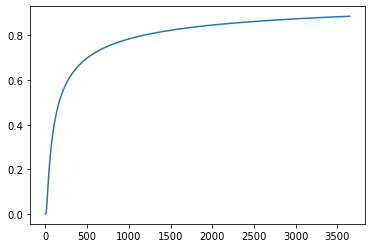

In [6]:
# SFD = streamflow depletion factor
plt.plot(sfd)

In [7]:
sfd1_max = np.max(np.array(sfd))

In [8]:
t_stop = 3651
t_end = 7300

In [9]:
sfd2 = sfd1_max - [erfc(sqrt(S * d ** 2 / (4 * Tr * (i - t_stop)))) 
    for i in range(t_end, t_stop, -1)]
sfd3 = (sfd2)
np.array(sfd3)

array([1.55105826e-05, 3.10274987e-05, 4.65507527e-05, ...,
       8.86016714e-01, 8.86017287e-01, 8.86017288e-01])

In [10]:
sfd3 = np.flip(sfd2, axis=0)

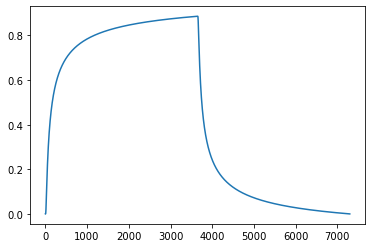

In [15]:
# concatenate 2 numpy arrays: row-wise
sfd4 = np.concatenate((sfd, sfd3))
plt.plot(sfd4)

In [12]:
Qw = 10      # pumping rate of the well ({Qw}; [L3/T])

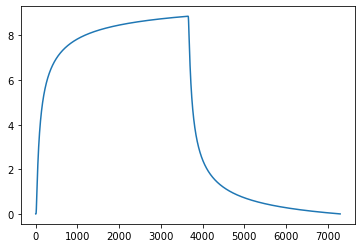

In [16]:
# Plot capture fraction through time
capture = Qw * np.array(sfd4)
plt.plot(capture)

In [ ]:
np.savetxt("Jenkins_1968.csv", capture, delimiter="/")